In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sns.set_theme(style='whitegrid')

In [3]:
english_likert = pd.read_csv('finaldata/likertEnglishSLP.csv')
spanish_likert = pd.read_csv('finaldata/likertSpanishSLP.csv')

In [4]:
final_likert = english_likert.append(spanish_likert)
final_likert.columns

/tmp/ipykernel_24715/1722827039.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_likert = english_likert.append(spanish_likert)


Index(['Unnamed: 0', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30',
       'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40',
       'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46'],
      dtype='object')

In [5]:
final_likert = final_likert.reset_index()
final_likert = final_likert.drop(['Unnamed: 0', 'index'], axis=1)
final_likert.to_csv('finaldata/finalLikertSLP.csv')

In [10]:
df = pd.read_csv('finaldata/finalLikertSLP.csv')
df = df.drop(['Unnamed: 0', 'index'], axis=1)
df

KeyError: "['index'] not found in axis"

In [6]:
knowledge_of_intervention = ['Q24', 'Q29', 'Q33','Q35', 'Q36', 'Q43']
religion = ['Q27', 'Q30', 'Q34', 'Q39', 'Q42', 'Q45']
socioeconomic_status = ['Q25', 'Q31', 'Q37', 'Q40', 'Q44', 'Q46']
stigmas_perception = ['Q23', 'Q26', 'Q28', 'Q32', 'Q38', 'Q41']

In [7]:
def getChart(questions, title):
    df = pd.read_csv('finaldata/finalLikertSLP.csv')
    df = df[questions]
    table = df.describe().T
    sns.set(rc = {'figure.figsize':(8,8)})
    fig = sns.barplot(data=table, x=questions, y='mean').set(title=title)
    plt.savefig(f'images/{title}.png')

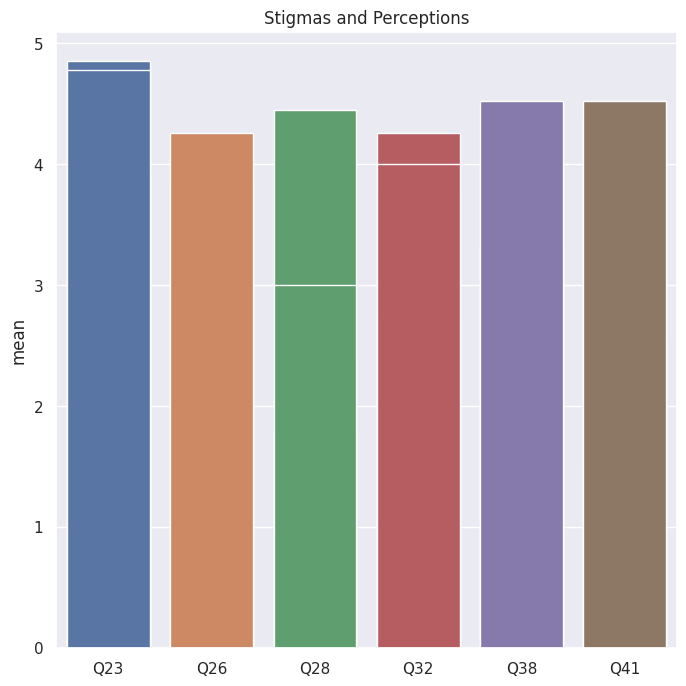

In [8]:
getChart(knowledge_of_intervention, 'Knowledge of Intervention')
getChart(religion, 'Religion')
getChart(socioeconomic_status, 'Socioeconomic Status')
getChart(stigmas_perception, 'Stigmas and Perceptions')

In [11]:
likert_score_knowledge = df[knowledge_of_intervention].sum()
likert_score_religion = df[religion].sum()
likert_score_socioeconomic = df[socioeconomic_status].sum()
likert_score_stigma = df[stigmas_perception].sum()

In [12]:
a = list(likert_score_knowledge.values)
b = list(likert_score_religion.values)
c = list(likert_score_socioeconomic)
d = list(likert_score_stigma)

In [13]:
stats.kruskal(a, b, c, d)

KruskalResult(statistic=9.207009142359606, pvalue=0.026661515241180128)